In [1]:
import h5py
import os

In [3]:
ground = h5py.File('g_unify20190411.h5', 'r')
g = ground['X']

In [4]:
ele_zs = h5py.File('e_zs_unify20190411.h5', 'r')
ezs = ele_zs['X']

In [5]:
ele_sd = h5py.File('e_sd_unify20190411.h5', 'r')
esd = ele_sd['X']

In [8]:
#进行样条差值
import scipy.interpolate as spi
import numpy as np

## 高速交通速度

In [14]:
#写h5py文件
dataset = h5py.File(os.path.join("inte_e_sd.h5"), 'w')
dataset.create_dataset('X',(len(esd),30,30),dtype='f')
for i in range(len(esd)): 
    x = np.linspace(0,20,20)#x
    y = np.linspace(0,20,20)#y

    newfunc = spi.interp2d(x, y, esd[i], kind='cubic') 
    # 计算100*100的网格上的插值
    xnew = np.linspace(0,20,30)#x
    ynew = np.linspace(0,20,30)#y
    fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值
    inputs = fnew
    dataset['X'][i] = list(inputs)
dataset.close()

In [15]:
iesd = h5py.File('inte_e_sd.h5', 'r')
X = iesd['X']

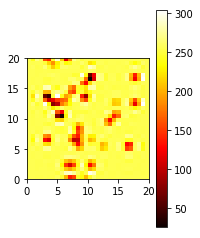

In [19]:
import pylab as pl
import matplotlib as mpl
pl.subplot(121)
im1=pl.imshow(255-X[0], extent=[0,20,0,20], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")#pl.cm.jet
#extent=[-1,1,-1,1]为x,y范围  favals为
pl.colorbar(im1)

In [17]:
%matplotlib inline

## 高速交通指数

In [20]:
#写h5py文件
dataset = h5py.File(os.path.join("inte_e_zs.h5"), 'w')
dataset.create_dataset('X',(len(esd),30,30),dtype='f')
for i in range(len(ezs)): 
    x = np.linspace(0,20,20)#x
    y = np.linspace(0,20,20)#y

    newfunc = spi.interp2d(x, y, ezs[i], kind='cubic') 
    # 计算100*100的网格上的插值
    xnew = np.linspace(0,20,30)#x
    ynew = np.linspace(0,20,30)#y
    fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值
    inputs = fnew
    dataset['X'][i] = list(inputs)
dataset.close()

## 地面交通指数

In [21]:
#写h5py文件
dataset = h5py.File(os.path.join("inte_g.h5"), 'w')
dataset.create_dataset('X',(len(g),30,30),dtype='f')
for i in range(len(g)): 
    x = np.linspace(0,20,20)#x
    y = np.linspace(0,20,20)#y

    newfunc = spi.interp2d(x, y, g[i], kind='cubic') 
    # 计算100*100的网格上的插值
    xnew = np.linspace(0,20,30)#x
    ynew = np.linspace(0,20,30)#y
    fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值
    inputs = fnew
    dataset['X'][i] = list(inputs)
dataset.close()